# Regularization Demo Notebook
Check if the regularization is workink with empirical examples

In [1]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import time
import matplotlib.pyplot as plt
from MLP import MLP
from utils.preprocessing import split
import pandas as pd
from sklearn.datasets import make_gaussian_quantiles

## Easy dataset

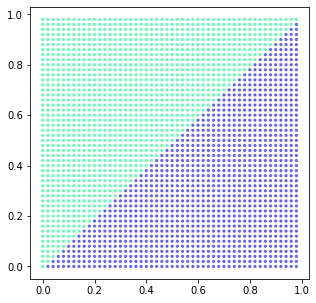

In [379]:
a = np.arange(50)/50
b = np.arange(50)/50
A, B = np.meshgrid(a, b)
data = np.column_stack((A.flatten(), B.flatten()))
labels = np.ones(len(data))
labels[data[:,0]>data[:,1]] = 0
labels = labels.reshape((len(labels), 1))
fig = plt.figure(figsize=(5,5))
plt.scatter(data[:, 0], data[:,1], c=labels, s=5, alpha=0.5, cmap = 'winter')
plt.show()

In [395]:
data_and_label = np.column_stack((data, labels))
train_data, val_data = split(data_and_label, frac_training=0.8, shuffle = True)

train_labels = train_data[:,-1].reshape((len(train_data), 1))
val_labels = val_data[:,-1].reshape((len(val_data), 1))
train_data = train_data[:,:-1]
val_data = val_data[:,:-1]
structure=[1]
act_func=[("sigmoid",1),]
start=[0.1]
learning_rate=0.01
lamb=1e-4
netw = MLP(structure, func=act_func,
           starting_points=start, 
           eta = learning_rate, lamb = lamb)
N_epoch = 2000
netw.train(train_data, train_labels, val_data, val_labels, epoch = N_epoch)

Epoch 2000:  [train MEE = 0.0664]  [val MEE = 0.0590]                              
Elapsed time: 2.325727939605713 s


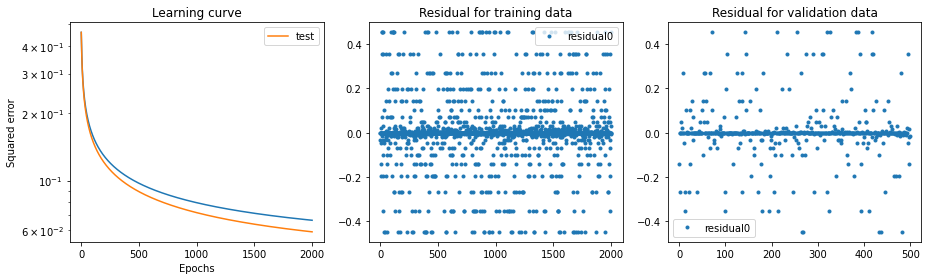

In [396]:
train_pred = netw.predict(train_data)
val_pred = netw.predict(val_data)

x = np.arange(len(netw.train_MEE))

fig = plt.figure(figsize=(13,4))

fig.add_subplot(131)
plt.plot(x,netw.train_MEE)
plt.plot(x,netw.val_MEE,label="test")
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Squared error")
plt.yscale("log")
plt.legend()

fig.add_subplot(132)
plt.title('Residual for training data')
plt.plot(np.arange(len(train_labels)),train_labels-train_pred,".",label="residual0")
plt.legend()

fig.add_subplot(133)
plt.title('Residual for validation data')
plt.plot(np.arange(len(val_labels)),val_labels-val_pred,".",label="residual0")
plt.legend()
plt.tight_layout()
plt.show()

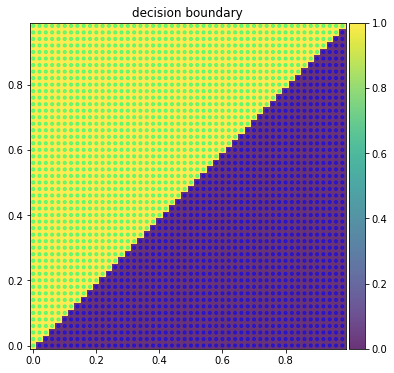

In [397]:
from mpl_toolkits.axes_grid1 import make_axes_locatable                         
fig, ax = plt.subplots(1,1, figsize = (6,6))                               
x_arr = np.arange(50)/50                                                
y_arr = np.arange(50)/50                                                 
X, Y = np.meshgrid(x_arr, y_arr)                                            
Z = np.empty(X.shape)                                                       
for i, x in enumerate(x_arr):                                               
    for j, y in enumerate(y_arr):  
        raw_pred = netw.predict(np.array([[x,y]]))[0][0] 
        Z[j][i] = 1 if raw_pred > 0.5 else 0                
c = ax.pcolormesh(X, Y, Z, shading='auto', alpha = 0.8)                               
ax.set_title('decision boundary')                                        
divider = make_axes_locatable(ax)                                        
cax = divider.append_axes('right', size='5%', pad=0.05)                     
fig.colorbar(c, cax = cax)   
ax.scatter(data[:, 0], data[:,1], c=labels, s=10, alpha=0.5, cmap = 'winter')
plt.show()

## Hard dataset

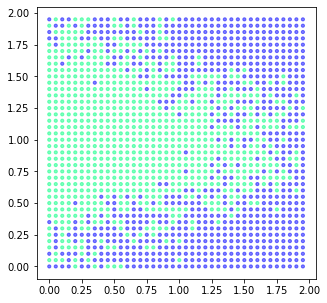

In [319]:
a = np.arange(40)/20
b = np.arange(40)/20
A, B = np.meshgrid(a, b)
data = np.column_stack((A.flatten(), B.flatten()))
labels = np.ones(len(data))
def f(x): 
    return np.sin(np.pi*x - np.pi/2) + 2*np.random.rand(len(x))
labels[data[:,0] > f(data[:,1])] = 0
labels = labels.reshape((len(labels), 1))
fig = plt.figure(figsize=(5,5))
plt.scatter(data[:, 0], data[:,1], c=labels, s=10, alpha=0.5, cmap = 'winter')
plt.show()

In [356]:
data_and_label = np.column_stack((data, labels))
train_data, val_data = split(data_and_label, frac_training=0.8, shuffle = True)

train_labels = train_data[:,-1].reshape((len(train_data), 1))
val_labels = val_data[:,-1].reshape((len(val_data), 1))
train_data = train_data[:,:-1]
val_data = val_data[:,:-1]
structure=[2, 1]
act_func=[("sigmoid",1)]*3
start=[2.]*3
learning_rate=0.001
lamb=0#1e-4
netw = MLP(structure, func=act_func,
           starting_points=start, 
           eta = learning_rate, lamb = lamb)
N_epoch = 600
netw.train(train_data, train_labels, val_data, val_labels, epoch = N_epoch)

Epoch 600:  [train MEE = 0.4068]  [val MEE = 0.4131]                              
Elapsed time: 0.8429591655731201 s


In [357]:
N_epoch = 4000
netw.train(train_data, train_labels, val_data, val_labels, epoch = N_epoch)

Epoch 4600:  [train MEE = 0.2617]  [val MEE = 0.2684]                              
Elapsed time: 5.81193470954895 s


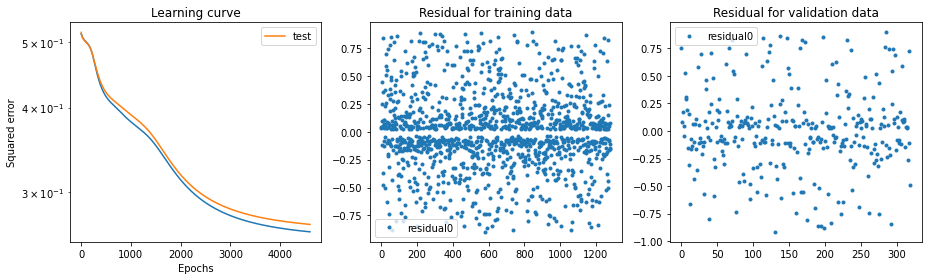

In [358]:
train_pred = netw.predict(train_data)
val_pred = netw.predict(val_data)

x = np.arange(len(netw.train_MEE))

fig = plt.figure(figsize=(13,4))

fig.add_subplot(131)
plt.plot(x,netw.train_MEE)
plt.plot(x,netw.val_MEE,label="test")
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Squared error")
plt.yscale("log")
plt.legend()

fig.add_subplot(132)
plt.title('Residual for training data')
plt.plot(np.arange(len(train_labels)),train_labels-train_pred,".",label="residual0")
plt.legend()

fig.add_subplot(133)
plt.title('Residual for validation data')
plt.plot(np.arange(len(val_labels)),val_labels-val_pred,".",label="residual0")
plt.legend()
plt.tight_layout()
plt.show()

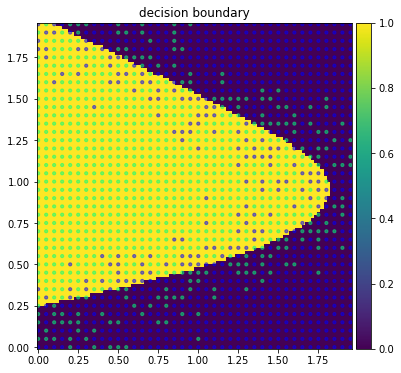

In [359]:
from mpl_toolkits.axes_grid1 import make_axes_locatable                         
fig, ax = plt.subplots(1,1, figsize = (6,6))                               
x_arr = np.linspace(np.min(data),np.max(data),100)                                                
y_arr = np.linspace(np.min(data),np.max(data),100)                                                 
X, Y = np.meshgrid(x_arr, y_arr)                                            
Z = np.empty(X.shape)                                                       
for i, x in enumerate(x_arr):                                               
    for j, y in enumerate(y_arr): 
        raw_pred = netw.predict(np.array([[x,y]]))[0][0] 
        Z[j][i] = 1 if raw_pred > 0.5 else 0
c = ax.pcolormesh(X, Y, Z, shading='nearest')                               
ax.set_title('decision boundary')                                        
divider = make_axes_locatable(ax)                                        
cax = divider.append_axes('right', size='5%', pad=0.05)                     
fig.colorbar(c, cax = cax)   
ax.scatter(data[:, 0], data[:,1], c=labels, s=10, alpha=0.5, cmap = 'winter')
plt.show()

## Does Tikhonov regularization really work?

In [361]:
structure=[2, 1]
act_func=[("sigmoid",1)]*3
start=[2.]*3
learning_rate=0.001
lamb=5e-4
netw = MLP(structure, func=act_func,
           starting_points=start, 
           eta = learning_rate, lamb = lamb)
N_epoch = 5000
netw.train(train_data, train_labels, val_data, val_labels, epoch = N_epoch)

Epoch 5000:  [train MEE = 0.4092]  [val MEE = 0.4160]                              
Elapsed time: 7.246829032897949 s


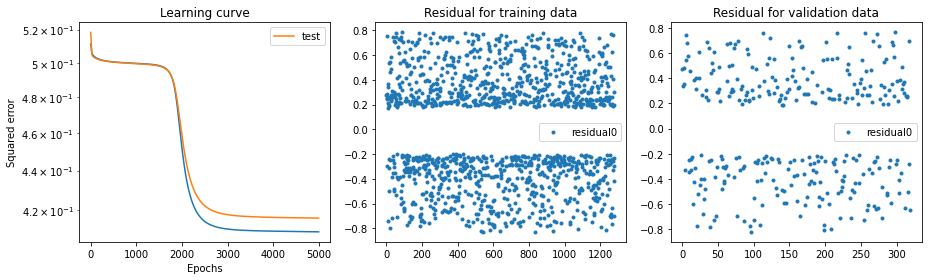

In [362]:
train_pred = netw.predict(train_data)
val_pred = netw.predict(val_data)

x = np.arange(len(netw.train_MEE))

fig = plt.figure(figsize=(13,4))

fig.add_subplot(131)
plt.plot(x,netw.train_MEE)
plt.plot(x,netw.val_MEE,label="test")
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Squared error")
plt.yscale("log")
plt.legend()

fig.add_subplot(132)
plt.title('Residual for training data')
plt.plot(np.arange(len(train_labels)),train_labels-train_pred,".",label="residual0")
plt.legend()

fig.add_subplot(133)
plt.title('Residual for validation data')
plt.plot(np.arange(len(val_labels)),val_labels-val_pred,".",label="residual0")
plt.legend()
plt.tight_layout()
plt.show()

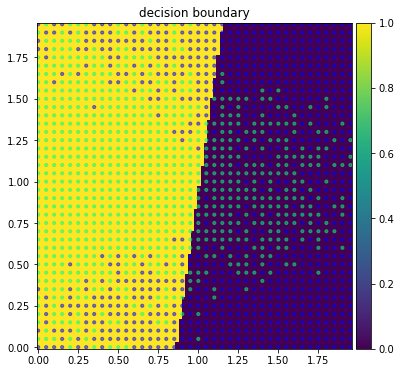

In [363]:
from mpl_toolkits.axes_grid1 import make_axes_locatable                         
fig, ax = plt.subplots(1,1, figsize = (6,6))                               
x_arr = np.linspace(np.min(data),np.max(data),100)                                                
y_arr = np.linspace(np.min(data),np.max(data),100)                                                 
X, Y = np.meshgrid(x_arr, y_arr)                                            
Z = np.empty(X.shape)                                                       
for i, x in enumerate(x_arr):                                               
    for j, y in enumerate(y_arr): 
        raw_pred = netw.predict(np.array([[x,y]]))[0][0] 
        Z[j][i] = 1 if raw_pred > 0.5 else 0
c = ax.pcolormesh(X, Y, Z, shading='nearest')                               
ax.set_title('decision boundary')                                        
divider = make_axes_locatable(ax)                                        
cax = divider.append_axes('right', size='5%', pad=0.05)                     
fig.colorbar(c, cax = cax)   
ax.scatter(data[:, 0], data[:,1], c=labels, s=10, alpha=0.5, cmap = 'winter')
plt.show()

As expected this send us in underfitting cause the net is little!